In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as st

In [2]:
data=pd.read_csv('athlete_events.csv');

In [3]:
# Dropping Unnecessary Columns
del data["NOC"]
del data["Games"]
del data["Event"]
del data["ID"]

In [4]:
# Taking only necessary years into account
data.drop(data[data['Year']<2000].index,inplace=True)

In [5]:
# To Check Whether columns have null values
# False:- No Null values
# True:- Null values present
data['Name'].isnull().values.any()

False

In [6]:
data['Sex'].isnull().values.any()

False

In [7]:
data['Age'].isnull().values.any()

True

In [8]:
data['Height'].isnull().values.any()

True

In [9]:
data['Weight'].isnull().values.any()

True

In [10]:
data['Team'].isnull().values.any()

False

In [11]:
data['Year'].isnull().values.any()

False

In [12]:
data['Season'].isnull().values.any()

False

In [13]:
data['City'].isnull().values.any()

False

In [14]:
data['Sport'].isnull().values.any()

False

In [15]:
data['Medal'].isnull().values.any()

True

In [16]:
# Replacing null values under Medal with a new category No Medal 
data["Medal"].fillna("No Medal",inplace=True)

In [17]:
# Dropping rows with remaining null values
data=data.dropna()

In [18]:
# Removing Repititions
data=pd.DataFrame.drop_duplicates(data)

In [19]:
# Sorting the rows in ascending based on Year
data=data.sort_values(by='Year')

In [20]:
# Resetting Indexes after dropping rows
data.reset_index(drop=True)

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Medal
0,Miho Takeda,F,24.0,165.0,54.0,Japan,2000,Summer,Sydney,Synchronized Swimming,Silver
1,Andrea Colombo,M,26.0,190.0,75.0,Italy,2000,Summer,Sydney,Athletics,No Medal
2,Pedro E. Coln Hernndez,M,34.0,180.0,75.0,Puerto Rico,2000,Summer,Sydney,Sailing,No Medal
3,Oleksandr Stepanian,M,32.0,163.0,58.0,Ukraine,2000,Summer,Sydney,Wrestling,No Medal
4,Nguyn Th Xun Mai,F,21.0,165.0,57.0,Vietnam,2000,Summer,Sydney,Taekwondo,No Medal
...,...,...,...,...,...,...,...,...,...,...,...
66345,Kotuku Ngawati,F,22.0,165.0,60.0,Australia,2016,Summer,Rio de Janeiro,Swimming,No Medal
66346,Harold Correa,M,28.0,190.0,81.0,France,2016,Summer,Rio de Janeiro,Athletics,No Medal
66347,Esther Stam,F,29.0,174.0,75.0,Georgia,2016,Summer,Rio de Janeiro,Judo,No Medal
66348,Santisouk Inthavong,M,16.0,170.0,60.0,Laos,2016,Summer,Rio de Janeiro,Swimming,No Medal


In [21]:
# Writing the cleaned data into a new csv file
data.to_csv("Cleaned.csv",mode='w',index=False)

In [22]:
# Graphing
# Remove outliers numerical values using the graphs

In [23]:
# Reading cleaned data from the csv file
cleaned_data=pd.read_csv("Cleaned.csv")

In [24]:
# Dropping rows which have 'No Medal' in the Medal column
cleaned_data=cleaned_data[~cleaned_data['Medal'].isin(['No Medal'])]

In [25]:
# Resetting the indices
cleaned_data.reset_index(drop=True)

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Medal
0,Miho Takeda,F,24.0,165.0,54.0,Japan,2000,Summer,Sydney,Synchronized Swimming,Silver
1,Harald Stenvaag,M,47.0,182.0,90.0,Norway,2000,Summer,Sydney,Shooting,Bronze
2,Adam David Commens,M,24.0,166.0,74.0,Australia,2000,Summer,Sydney,Hockey,Bronze
3,Christine Smith Collins,F,31.0,170.0,58.0,United States,2000,Summer,Sydney,Rowing,Bronze
4,"Daniel James ""Danny"" Collins",M,29.0,190.0,100.0,Australia,2000,Summer,Sydney,Canoeing,Silver
...,...,...,...,...,...,...,...,...,...,...,...
11505,Timothey N'Guessan,M,23.0,186.0,105.0,France,2016,Summer,Rio de Janeiro,Handball,Silver
11506,Marco Innocenti,M,37.0,170.0,97.0,Italy,2016,Summer,Rio de Janeiro,Shooting,Silver
11507,Mariya Stadnik,F,28.0,157.0,48.0,Azerbaijan,2016,Summer,Rio de Janeiro,Wrestling,Silver
11508,Yukiko Inui,F,25.0,169.0,55.0,Japan,2016,Summer,Rio de Janeiro,Synchronized Swimming,Bronze


In [26]:
# Writing the cleaned data into a csv file
cleaned_data.to_csv("bar_data.csv",mode='w',index=False)

In [27]:
# Reading only 'Team' and 'Medal' columns and printing the data 
df_bar=pd.read_csv("bar_data.csv",usecols=['Team','Medal'])
df_bar_1=pd.read_csv("bar_data.csv",usecols=['Team','Medal'])
print(df_bar)

                Team   Medal
0              Japan  Silver
1             Norway  Bronze
2          Australia  Bronze
3      United States  Bronze
4          Australia  Silver
...              ...     ...
11505         France  Silver
11506          Italy  Silver
11507     Azerbaijan  Silver
11508          Japan  Bronze
11509    New Zealand  Silver

[11510 rows x 2 columns]


In [28]:
# Finding frequency of each team
df_bar1=pd.DataFrame(df_bar_1.Team.value_counts())

In [29]:
# Sorting the values in descending order based on the number of times a team has won medals
# Selecting only the top 10 Teams and converting it into a list
df_bar1.sort_values(by='Team',ascending=False)
df_bar1=df_bar1.head(10)
idx=df_bar1.index
countries=idx.tolist()
print(countries)

['United States', 'Russia', 'Germany', 'Australia', 'China', 'Canada', 'Great Britain', 'France', 'Italy', 'Netherlands']


In [30]:
# Refining the dataframe so that it contains only the top 10 teams' details
# Resetting the indices
df_bar=df_bar[df_bar['Team'].isin(countries)]
print(df_bar)
df_bar.reset_index(drop=True)

                Team   Medal
2          Australia  Bronze
3      United States  Bronze
4          Australia  Silver
8            Germany  Bronze
10           Germany    Gold
...              ...     ...
11500          Italy  Silver
11503        Germany  Bronze
11504         France  Silver
11505         France  Silver
11506          Italy  Silver

[6355 rows x 2 columns]


,Team,Medal
0,Australia,Bronze
1,United States,Bronze
2,Australia,Silver
3,Germany,Bronze
4,Germany,Gold
...,...,...
6350,Italy,Silver
6351,Germany,Bronze
6352,France,Silver
6353,France,Silver


In [31]:
# Counting the total number of Medals
pd.DataFrame(df_bar.Medal.value_counts())

,Medal
Gold,2225
Silver,2067
Bronze,2063


In [32]:
# List of x-co-ordinates
team=df_bar.Team.unique().tolist()
print(team)

['Australia', 'United States', 'Germany', 'Canada', 'Russia', 'France', 'Great Britain', 'China', 'Italy', 'Netherlands']


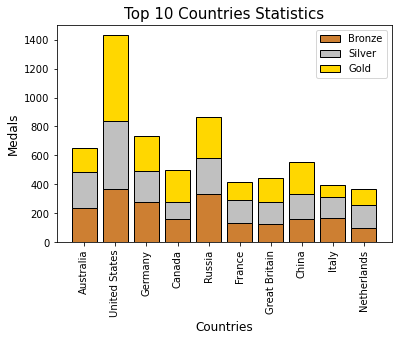

In [33]:
# Plotting the bar graph
# plt.bar(x, height, label, color, edgecolor)
p1=plt.bar(team,height=df_bar[df_bar.Medal=="Bronze"].Team.value_counts().reindex(team),label='Bronze',color='#CD7F32',edgecolor='black')
p2=plt.bar(team,height=df_bar[df_bar.Medal=="Silver"].Team.value_counts().reindex(team),label='Silver',color='silver',edgecolor='black',bottom=df_bar[df_bar.Medal=="Bronze"].Team.value_counts().reindex(team))
p3=plt.bar(team,height=df_bar[df_bar.Medal=="Gold"].Team.value_counts().reindex(team),label='Gold',color='gold',edgecolor='black',bottom=df_bar[df_bar.Medal=="Bronze"].Team.value_counts().reindex(team)+df_bar[df_bar.Medal=="Silver"].Team.value_counts().reindex(team))
plt.xticks(team,rotation='vertical')
plt.ylabel("Medals",fontsize='12')
plt.xlabel("Countries",fontsize='12')
plt.legend(loc="upper right")
plt.title("Top 10 Countries Statistics",fontsize='15')
plt.show()

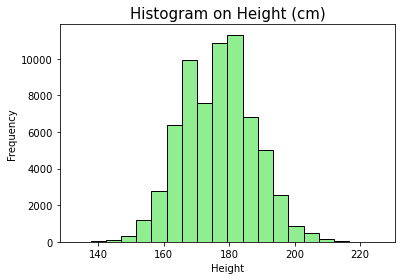

In [34]:
plt.title("Histogram on Height (cm)",fontsize='15')
plt.hist(data.Height,20,color="lightgreen",edgecolor="black")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

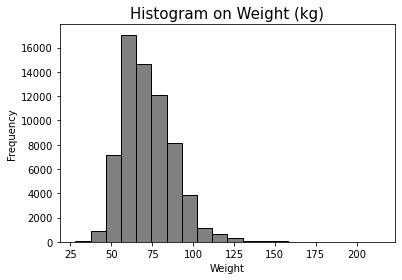

In [35]:
plt.title("Histogram on Weight (kg)",fontsize='15')
plt.hist(data.Weight,20,color="grey",edgecolor="black")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

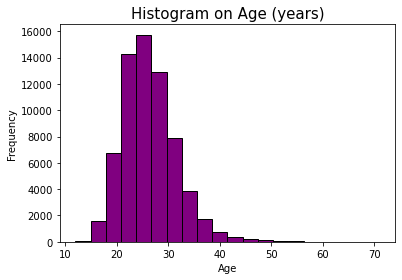

In [36]:
plt.title("Histogram on Age (years)",fontsize='15')
plt.hist(data.Age,20,color="purple",edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

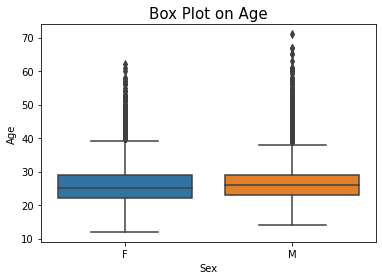

In [37]:
plt.title("Box Plot on Age",fontsize='15')
sns.boxplot(x='Sex',y='Age',data=data)

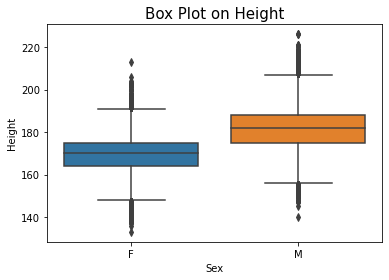

In [38]:
plt.title("Box Plot on Height",fontsize='15')
sns.boxplot(x='Sex',y='Height',data=data)

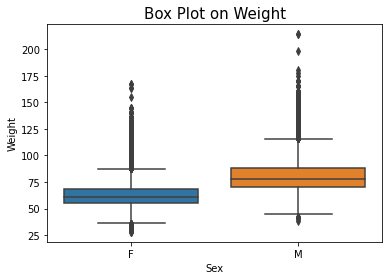

In [39]:
plt.title("Box Plot on Weight",fontsize='15')
sns.boxplot(x='Sex',y='Weight',data=data)

In [40]:
# Filtering unwanted outliers the in the numerical data i.e. Age,Height and Weight.
# Removing unwanted outliers for Age 
index=data[(data['Age']>=70)|(data['Age']<=15)].index
data.drop(index,inplace=True)

In [41]:
# Removing unwanted outliers for Height
index=data[(data['Height']>=240)|(data['Height']<=120)].index
data.drop(index,inplace=True)

In [42]:
# Removing unwanted outliers for Weight
index=data[(data['Weight']>=180)|(data['Weight']<=25)].index
data.drop(index,inplace=True)

In [43]:
# Mean and Variance for all the numberical columns i.e. Age,Height,Weight
# Column Age
print("Age")
print("Mean:",round(data['Age'].mean(),2),"years")
print("Variance:",round(data['Age'].var(),2),"years")

Age
Mean: 26.15 years
Variance: 28.43 years


In [44]:
# Column Height
print("Height")
print("Mean:",round(data['Height'].mean(),2),"cm")
print("Variance:",round(data['Height'].var(),2),"cm")

Height
Mean: 176.72 cm
Variance: 117.64 cm


In [45]:
# Column Weight
print("Weight")
print("Mean:",round(data['Weight'].mean(),2),"kg")
print("Variance:",round(data['Weight'].var(),2),"kg")

Weight
Mean: 72.37 kg
Variance: 244.41 kg


In [46]:
# Normalization and Standardization to make Mean=0 and Variance=1

# Normalization is a technique often applied as part of data preparation for machine learning.
# The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting 
# differences in the ranges of values.

# The values within a normalized column will all be in the range of -3 to 3, thereby making the mean=0 and variance=1.

In [47]:
X_Data=data[['Age','Height','Weight']]
normalized_Data=(X_Data-X_Data.mean())/X_Data.std()
normalized_Data

,Age,Height,Weight
235341,-0.402616,-1.080188,-1.174824
43647,-0.027540,1.224730,0.168427
43695,1.472763,0.302763,0.168427
228942,1.097687,-1.264582,-0.918967
170602,-0.965230,-1.080188,-0.982931
...,...,...,...
170484,-0.777692,-1.080188,-0.791038
44911,0.347536,1.224730,0.552214
227365,0.535073,-0.250418,0.168427
103223,-1.902919,-0.619205,-0.791038


In [48]:
print("Normalized Age")
print("Mean:",round(normalized_Data['Age'].mean()))
print("Variance:",round(normalized_Data['Age'].var()))

Normalized Age
Mean: 0
Variance: 1


In [49]:
print("Normalized Height")
print("Mean:",round(normalized_Data['Height'].mean()))
print("Variance:",round(normalized_Data['Height'].var()))

Normalized Height
Mean: 0
Variance: 1


In [50]:
print("Normalized Weight")
print("Mean:",round(normalized_Data['Weight'].mean()))
print("Variance:",round(normalized_Data['Weight'].var()))

Normalized Weight
Mean: 0
Variance: 1


In [51]:
# Using graphs to verify that the column Height,Weight,Age are normally distributed

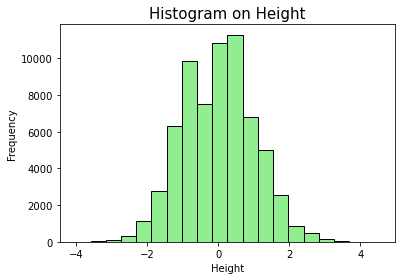

In [52]:
plt.title("Histogram on Height",fontsize='15')
plt.hist(normalized_Data.Height,20,color="lightgreen",edgecolor="black")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

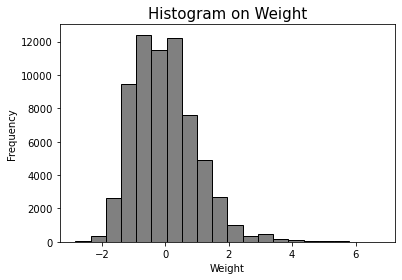

In [53]:
plt.title("Histogram on Weight",fontsize='15')
plt.hist(normalized_Data.Weight,20,color="grey",edgecolor="black")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

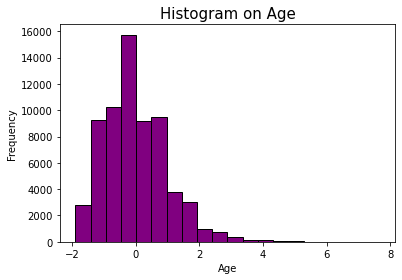

In [54]:
plt.title("Histogram on Age",fontsize='15')
plt.hist(normalized_Data.Age,20,color="purple",edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [55]:
# Hypothesis testing
# A Popular study shows that the average height of males is 7% greater than that of female
# average height of females is 169.691812cm
# Hence from the study mean male height should be greater than 181.6cm
# Problem statement. To check whether the average height of Male participants entering into the olympic games is
# greater than 181.6 cm.
import math
m=data.groupby('Sex').Height.mean()
s=data.groupby('Sex').Height.std()
# Ho:u<=181.6
# H1:u>181.6 (Right-tailed)
mean=m['M']
sd=s['M']
alpha=0.05
n=data['Sex'].tolist().count('M')
z=(mean-181.6)/(sd/math.sqrt(n))
pValue=round(st.norm.sf(abs(z)),3)
print("p-value:",pValue)
print("Aplha:",alpha)
print("Since p value is less than the significance level(0.05) we have sufficient evidence to reject null hypothesis")
# Since p value is less than the significance level(0.05) we have sufficient evidence to reject null hypothesis  

p-value: 0.016
Aplha: 0.05
Since p value is less than the significance level(0.05) we have sufficient evidence to reject null hypothesis


In [56]:
# Correlation
# To find the correlation between the height and weight of participants entering the olympics 
gym=pd.DataFrame({'height': data['Height'], 'weight': data['Weight']})

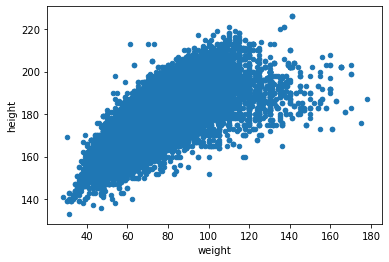

In [57]:
# Positive Correlation demonstrated by the graph
gym.plot.scatter(x = 'weight', y = 'height')
# Hence form the scatter plot it can be infered that the height 
# and weight show positive correlation with each other